## Este ejercicio tiene como objetivo explicar la construccion de un modelo de Redes Neuronales Artificiales para reconocimiento facial usando Tensorflow y Keras

In [1]:
#!pip install tensorflow==2.0.0

In [ ]:
import matplotlib.pyplot as plt
import cv2
import ipywidgets as widgets
%matplotlib inline
import tensorflow as tf
tf.__version__
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

!unzip '/content/sample_data/face_data.zip'

In [ ]:
person1 = cv2.imread('/content/face_data/train/andres/andres.1.JPG')
person1 = cv2.cvtColor(person1,cv2.COLOR_BGR2RGB)
person1.shape

In [ ]:
plt.imshow(person1)

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:
image_gen = ImageDataGenerator(rotation_range=20, # rotacion
                               width_shift_range=0.1, # cambio del ancho de l imagen maximo 10%
                               height_shift_range=0.1, # cambio del alto de l imagen maximo 10%
                               rescale=1/255, # normalizar.
                               shear_range=0.2, # Corte de la imagen maximo 20%
                               zoom_range=0.2, # Zoom maximo 20%
                               horizontal_flip=True, # Permitir rotacion horizontal
                               fill_mode='nearest' # Llenar valores con pixel mas cercano
                              )

In [ ]:
plt.imshow(image_gen.random_transform(person1))

In [ ]:
image_gen.flow_from_directory('/content/face_data/train')

In [ ]:
image_gen.flow_from_directory('/content/face_data/test')

In [10]:
# ancho, alto y RGB
image_shape = (200,180,3)

In [11]:
model = Sequential()

#Notar que input es el image shape

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=132, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

#Notar que la ultima capa tiene 4 salidas representando las categorias presentes

model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
batch_size = 4
train_image_gen = image_gen.flow_from_directory('/content/face_data/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

In [ ]:
train_image_gen.classes

In [ ]:
test_image_gen = image_gen.flow_from_directory('/content/face_data/test',
                                               #to automatically resize the images
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

In [ ]:
train_image_gen.class_indices

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%%time
steps_per_epoch = len(train_image_gen)//batch_size

results = model.fit_generator(train_image_gen,epochs=10,
                              steps_per_epoch=10,
                              validation_data=test_image_gen,
                             validation_steps=12)

In [ ]:
results.history

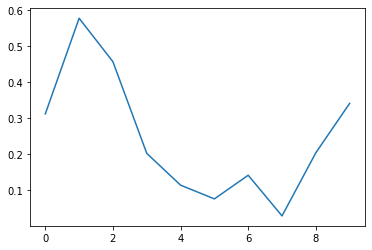

In [29]:
plt.plot(results.history['loss'])

In [ ]:
label_map = train_image_gen.class_indices
label_map = dict(map(reversed, label_map.items()))
label_map

In [32]:
import numpy as np
from keras.preprocessing import image

test_file = '/content/sample_data/demoimage.JPG'
test_img = image.load_img(test_file, target_size=(200, 180))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)
test_img = test_img/255

In [ ]:
model.predict_classes(test_img)

In [34]:
prediction_prob = model.predict(test_img)

In [ ]:
print(f'Probabilidad de la imagen a pertenecer a esta clase: {prediction_prob} ')

In [ ]:
y_prob = model.predict(test_img)
print(y_prob)
label_map[y_prob.argmax(axis=-1)[0]]

In [ ]:
# Salvamos el modelo
model.save('./model.h5')